In [1]:
import json

import pandas as pd
import numpy as np

from numpy import asarray
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

import lightgbm as lgb
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

pd.set_option('display.max_columns', None)

In [2]:
f = open('rows.json')

data = json.load(f)

f.close()
pd.set_option('display.max_columns', None)

In [3]:
df=pd.DataFrame(data["data"])
df.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,row-ww2d~girp.hb8n,00000000-0000-0000-94BE-9E231F8A2D69,0,1541998623,None,1541998623,None,{ },1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,CÃ´te d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,None,Test kit,30,19,551.0,29.0,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,None


In [4]:
df.drop([0,1,2,3,4,5,6,7],axis=1,inplace=True)
df.columns=['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)']
import re
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [5]:
display(df.head(2))
display(df.tail(2))

,ID,ProjectCode,PQ,POSO,ASNDN,Country,ManagedBy,FulfillVia,VendorINCOTerm,ShipmentMode,PQFirstSenttoClientDate,POSenttoVendorDate,ScheduledDeliveryDate,DeliveredtoClientDate,DeliveryRecordedDate,ProductGroup,SubClassification,Vendor,ItemDescription,MoleculeTestType,Brand,Dosage,DosageForm,UnitofMeasurePerPack,LineItemQuantity,LineItemValue,PackPrice,UnitPrice,ManufacturingSite,FirstLineDesignation,WeightKilograms,FreightCostUSD,LineItemInsuranceUSD
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,CÃ´te d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,None,Test kit,30,19,551.0,29.0,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,None
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.2,0.03,"Aurobindo Unit III, India",True,358,4521.5,None


,ID,ProjectCode,PQ,POSO,ASNDN,Country,ManagedBy,FulfillVia,VendorINCOTerm,ShipmentMode,PQFirstSenttoClientDate,POSenttoVendorDate,ScheduledDeliveryDate,DeliveredtoClientDate,DeliveryRecordedDate,ProductGroup,SubClassification,Vendor,ItemDescription,MoleculeTestType,Brand,Dosage,DosageForm,UnitofMeasurePerPack,LineItemQuantity,LineItemValue,PackPrice,UnitPrice,ManufacturingSite,FirstLineDesignation,WeightKilograms,FreightCostUSD,LineItemInsuranceUSD
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,7/1/2015,N/A - From RDC,9-Sep-15,4-Aug-15,11-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,17465,113871.8,6.52,0.11,Mylan (formerly Matrix) Nashik,True,1392,Freight Included in Commodity Cost,134.03
10323,86823,103-ZW-T30,FPQ-15197,SO-50022,DN-4336,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,10/16/2014,N/A - From RDC,31-Aug-15,4-Aug-15,11-Aug-15,ARV,Pediatric,SCMS from RDC,"Lamivudine/Zidovudine 30/60mg, dispersible tab...",Lamivudine/Zidovudine,Generic,30/60mg,Chewable/dispersible tablet - FDC,60,36639,72911.61,1.99,0.03,"Cipla, Goa, India",False,Weight Captured Separately,Freight Included in Commodity Cost,85.82


In [6]:
df.isnull().sum()

ID                            0
ProjectCode                   0
PQ                            0
POSO                          0
ASNDN                         0
Country                       0
ManagedBy                     0
FulfillVia                    0
VendorINCOTerm                0
ShipmentMode                360
PQFirstSenttoClientDate       0
POSenttoVendorDate            0
ScheduledDeliveryDate         0
DeliveredtoClientDate         0
DeliveryRecordedDate          0
ProductGroup                  0
SubClassification             0
Vendor                        0
ItemDescription               0
MoleculeTestType              0
Brand                         0
Dosage                     1736
DosageForm                    0
UnitofMeasurePerPack          0
LineItemQuantity              0
LineItemValue                 0
PackPrice                     0
UnitPrice                     0
ManufacturingSite             0
FirstLineDesignation          0
WeightKilograms               0
FreightC

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       10324 non-null  object
 1   ProjectCode              10324 non-null  object
 2   PQ                       10324 non-null  object
 3   POSO                     10324 non-null  object
 4   ASNDN                    10324 non-null  object
 5   Country                  10324 non-null  object
 6   ManagedBy                10324 non-null  object
 7   FulfillVia               10324 non-null  object
 8   VendorINCOTerm           10324 non-null  object
 9   ShipmentMode             9964 non-null   object
 10  PQFirstSenttoClientDate  10324 non-null  object
 11  POSenttoVendorDate       10324 non-null  object
 12  ScheduledDeliveryDate    10324 non-null  object
 13  DeliveredtoClientDate    10324 non-null  object
 14  DeliveryRecordedDate     10324 non-nul

In [8]:
for i in df.columns:
    display(i)
    display(df[i].unique())
    display(len(df[i].unique()))

'ID'

array(['1', '3', '4', ..., '86821', '86822', '86823'], dtype=object)

10324

'ProjectCode'

array(['100-CI-T01', '108-VN-T01', '112-NG-T01', '110-ZM-T01',
       '109-TZ-T01', '102-NG-T01', '107-RW-T01', '106-HT-T01',
       '113-ZW-T01', '108-VN-T30', '104-CI-T01', '100-HT-T01',
       '117-ET-T01', '116-ZA-T01', '123-NG-T01', '125-HT-T01',
       '102-GY-T01', '119-NA-T01', '131-NG-T01', '102-BW-T01',
       '111-MZ-T01', '144-BW-T01', '102-KE-T01', '133-NG-T01',
       '100-KZ-T01', '141-NA-T01', '114-UG-T01', '105-GY-T01',
       '139-NA-T01', '129-KG-T01', '100-SN-T01', '128-BJ-T01',
       '102-LS-T01', '130-NG-T01', '100-BW-T01', '100-ZW-T01',
       '100-PK-T01', '126-NG-T01', '151-NG-T01', '100-SZ-T01',
       '100-GH-T01', '120-AO-T01', '132-NG-T01', '153-NG-T01',
       '100-LB-T01', '151-NG-T30', '127-KE-T01', '510-KE-T01',
       '100-SL-T01', '136-RW-T01', '102-KE-T30', '110-ZM-T30',
       '106-HT-T30', '105-SS-T30', '111-MZ-T30', '102-BI-T30',
       '122-HT-T30', '161-ZA-T30', '116-ZA-T30', '133-NG-T30',
       '103-DO-T30', '104-CI-T30', '107-RW-T30', '103-M

142

'PQ'

array(['Pre-PQ Process', 'FPQ-10286', 'FPQ-4587', ..., 'FPQ-13316',
       'FPQ-14064', 'FPQ-16523'], dtype=object)

1237

'POSO'

array(['SCMS-4', 'SCMS-13', 'SCMS-20', ..., 'SO-51424', 'SO-51420',
       'SO-51680'], dtype=object)

6233

'ASNDN'

array(['ASN-8', 'ASN-85', 'ASN-14', ..., 'DN-4276', 'DN-4279', 'DN-4334'],
      dtype=object)

7030

'Country'

array(["CÃ´te d'Ivoire", 'Vietnam', 'Nigeria', 'Zambia', 'Tanzania',
       'Rwanda', 'Haiti', 'Zimbabwe', 'Ethiopia', 'South Africa',
       'Guyana', 'Namibia', 'Botswana', 'Mozambique', 'Kenya',
       'Kazakhstan', 'Uganda', 'Kyrgyzstan', 'Senegal', 'Benin',
       'Lesotho', 'Pakistan', 'Swaziland', 'Ghana', 'Angola', 'Lebanon',
       'Sierra Leone', 'Cameroon', 'South Sudan', 'Burundi',
       'Dominican Republic', 'Malawi', 'Congo, DRC', 'Sudan', 'Mali',
       'Guatemala', 'Togo', 'Afghanistan', 'Liberia', 'Burkina Faso',
       'Guinea', 'Libya', 'Belize'], dtype=object)

43

'ManagedBy'

array(['PMO - US', 'South Africa Field Office', 'Haiti Field Office',
       'Ethiopia Field Office'], dtype=object)

4

'FulfillVia'

array(['Direct Drop', 'From RDC'], dtype=object)

2

'VendorINCOTerm'

array(['EXW', 'FCA', 'DDU', 'CIP', 'DDP', 'CIF', 'N/A - From RDC', 'DAP'],
      dtype=object)

8

'ShipmentMode'

array(['Air', None, 'Truck', 'Air Charter', 'Ocean'], dtype=object)

5

'PQFirstSenttoClientDate'

array(['Pre-PQ Process', '7/25/2012', 'Date Not Captured', '11/18/2009',
       '5/3/2013', '8/19/2014', '1/6/2012', '2/22/2013', '10/28/2014',
       '2/20/2013', '2/17/2012', '11/9/2011', '2/6/2014', '3/10/2011',
       '9/11/2014', '4/30/2014', '4/8/2014', '7/11/2013', '10/5/2012',
       '6/13/2014', '8/4/2011', '3/18/2010', '6/19/2009', '1/28/2015',
       '8/12/2009', '9/3/2010', '12/8/2011', '10/17/2012', '9/2/2009',
       '9/24/2014', '6/3/2014', '8/11/2014', '8/29/2011', '7/9/2014',
       '6/17/2014', '6/21/2011', '3/15/2012', '3/10/2015', '6/25/2009',
       '12/11/2013', '1/22/2014', '2/7/2013', '4/11/2012', '8/13/2014',
       '4/1/2014', '7/16/2009', '5/15/2014', '10/20/2009', '10/17/2014',
       '5/17/2013', '10/5/2011', '7/26/2013', '7/15/2013', '7/10/2013',
       '5/21/2014', '7/18/2013', '1/29/2013', '4/26/2013', '10/8/2009',
       '2/2/2010', '4/30/2013', '7/17/2014', '6/24/2011', '4/15/2014',
       '5/16/2011', '11/14/2013', '2/3/2013', '12/29/2014', '11/12/201

765

'POSenttoVendorDate'

array(['Date Not Captured', '11/13/2006', '12/1/2006', '12/22/2006',
       '1/10/2007', '8/15/2012', '4/12/2007', '5/13/2007', '5/17/2007',
       '7/13/2007', '7/4/2007', '7/26/2007', '10/3/2007', '8/28/2007',
       '11/12/2007', '11/19/2007', '11/21/2007', '12/10/2007', '1/4/2008',
       '2/27/2008', '3/3/2008', '2/28/2008', '2/29/2008', '3/17/2008',
       '3/13/2008', '3/18/2008', '3/31/2008', '2/20/2008', '4/4/2008',
       '5/14/2008', '5/15/2008', '5/20/2008', '5/23/2008', '7/1/2008',
       '7/2/2008', '7/3/2008', '7/24/2008', '7/25/2008', '7/31/2008',
       '8/26/2008', '8/27/2008', '9/3/2008', '3/6/2009', '9/24/2008',
       '10/2/2008', '12/5/2007', '11/19/2008', '12/19/2008', '1/5/2009',
       '1/16/2009', '10/21/2008', '2/5/2009', '2/18/2009', '3/4/2009',
       '3/18/2009', '6/15/2009', '3/27/2009', '3/25/2009', '3/30/2009',
       '4/2/2009', '4/4/2009', '4/9/2009', '4/15/2009', '4/29/2009',
       '5/27/2009', '5/18/2009', '6/2/2009', '6/5/2009', '4/19/2006',
     

897

'ScheduledDeliveryDate'

array(['2-Jun-06', '14-Nov-06', '27-Aug-06', ..., '27-Oct-13',
       '29-Jan-14', '9-Sep-15'], dtype=object)

2006

'DeliveredtoClientDate'

array(['2-Jun-06', '14-Nov-06', '27-Aug-06', ..., '15-Feb-14',
       '28-May-14', '16-Apr-15'], dtype=object)

2093

'DeliveryRecordedDate'

array(['2-Jun-06', '14-Nov-06', '27-Aug-06', ..., '29-Mar-13', '7-Dec-13',
       '8-May-15'], dtype=object)

2042

'ProductGroup'

array(['HRDT', 'ARV', 'ACT', 'MRDT', 'ANTM'], dtype=object)

5

'SubClassification'

array(['HIV test', 'Pediatric', 'Adult', 'HIV test - Ancillary', 'ACT',
       'Malaria'], dtype=object)

6

'Vendor'

array(['RANBAXY Fine Chemicals LTD.', 'Aurobindo Pharma Limited',
       'Abbott GmbH & Co. KG',
       'SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LABORATORIES LIMITED)',
       'MERCK SHARP & DOHME IDEA GMBH (FORMALLY MERCK SHARP & DOHME B.V.)',
       'ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV)',
       'Trinity Biotech, Plc', 'EY Laboratories', 'CIPLA LIMITED',
       'BRISTOL-MYERS SQUIBB', 'ACCOUN NIGERIA LIMITED',
       'Premier Medical Corporation Ltd.',
       'CHEMBIO DIAGNOSTIC SYSTEMS, INC.', 'Orgenics, Ltd',
       'Orasure Technologies Inc.', 'Standard Diagnostics, Inc.',
       'JSI R&T INSTITUTE, INC.', 'GILEAD SCIENCES IRELAND, INC.',
       'BIO-RAD LABORATORIES (FRANCE)',
       'TURE PHARMACEUTICALS & MEDICAL SUPPLIES P.L.C.',
       'MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORATORIES)',
       'S. BUYS WHOLESALER', 'IDA FOUNDATION', 'ZEPHYR BIOMEDICALS',
       'HETERO LABS LIMITED', 'INTERNATIONAL HEALTHCARE DISTRIBUTORS',
       'STRIDES ARCOLAB LIMITED',

73

'ItemDescription'

array(['HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 Tests',
       'Nevirapine 10mg/ml, oral suspension, Bottle, 240 ml',
       'HIV 1/2, Determine Complete HIV Kit, 100 Tests',
       'Lamivudine 150mg, tablets, 60 Tabs',
       'Stavudine 30mg, capsules, 60 Caps',
       'Zidovudine 10mg/ml, oral solution, Bottle, 240 ml',
       'Efavirenz 200mg [Stocrin/Sustiva], capsule, 90 Caps',
       'Nevirapine 200mg, tablets, 60 Tabs',
       'Lopinavir/Ritonavir 200/50mg [Aluvia], tablets, 120 Tabs',
       'HIV 1/2, Uni-Gold HIV Kit, 20 Tests',
       'HIV 1/2, InstantChek HIV 1+2 Kit, 100 Tests',
       'Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs',
       '#102198**Didanosine 200mg [Videx], tablets, 60 Tabs',
       'HIV 1/2/O, First Response HIV 1-2.0, v.3.0 Cards Kit, 30 Tests',
       'Zidovudine 300mg, tablets, 60 Tabs',
       'Didanosine 2g [Videx], powder for oral solution 10mg/ml, reconstitute to 200 ml',
       'HIV 1/2, Stat-Pak HIV, Kit, 20 Tests',
       'HIV 1/2, Det

184

'MoleculeTestType'

array(['HIV, Reveal G3 Rapid HIV-1 Antibody Test', 'Nevirapine',
       'HIV 1/2, Determine Complete HIV Kit', 'Lamivudine', 'Stavudine',
       'Zidovudine', 'Efavirenz', 'Lopinavir/Ritonavir',
       'HIV 1/2, Uni-Gold HIV Kit', 'HIV 1/2, InstantChek HIV 1+2 Kit',
       'Lamivudine/Zidovudine', 'Didanosine',
       'HIV 1/2/O, First Response HIV 1-2.0, v.3.0 Cards Kit',
       'HIV 1/2, Stat-Pak HIV, Kit',
       'HIV 1/2, Determine HIV Kit, without Lancets',
       'HIV 1/2, OraQuick Advance HIV Rapid Antibody Kit',
       'HIV 1/2, Bioline 3.0 Kit, Lancets, Capillary pipets, Alcohol swabs included',
       'Tenofovir Disoproxil Fumarate',
       'HIV, Lancet, Safety, for HIV Test kits, 100 Pcs',
       'HIV 1/2, Capillus HIV Kit', 'HIV, Genie II HIV-1/HIV-2 Kit',
       'Saquinavir', 'Didanosine EC', 'Abacavir',
       'Artemether/Lumefantrine', 'Malaria Paramax-3 Kit',
       'Artesunate+Amodiaquine',
       'Efavirenz/Emtricitabine/Tenofovir Disoproxil Fumarate',
       'HIV 1, 

86

'Brand'

array(['Reveal', 'Generic', 'Determine', 'Stocrin/Sustiva', 'Aluvia',
       'Uni-Gold', 'InstantCHEK', 'Videx', 'First Response', 'Stat-Pak',
       'OraQuick', 'Bioline', 'Retrovir', 'Viread', 'Zerit', 'Capillus',
       'Genie', 'Invirase', 'Videx EC', 'Ziagen', 'Coartem', 'Viramune',
       'Paramax', 'Atripla', 'Kaletra', 'Epivir', 'Norvir', 'Truvada',
       'Clearview', 'Colloidal Gold', 'INSTi', 'Trizivir', 'Visitect',
       'Viracept', 'DoubleCheck', 'Bundi', 'ImmunoComb', 'Crixivan',
       'LAV', 'Pepti-LAV', 'Intelence', 'Prezista', 'Isentress',
       'Reyataz', 'Combivir', 'Multispot', 'CareStart', 'Hexagon'],
      dtype=object)

48

'Dosage'

array([None, '10mg/ml', '150mg', '30mg', '200mg', '200/50mg', '150/300mg',
       '300mg', '2g', '1mg/ml', '600mg', '25mg', '20mg', '250mg', '400mg',
       '20/120mg', '50+153mg', '600/200/300mg', '100mg', '15mg',
       '80/20mg/ml', '600mg/2ml', '150/200/30mg', '100/25mg', '50mg',
       '300/200mg', '150/300/200mg', '133.3/33.3mg', '80mg/ml', '30/6mg',
       '20mg/ml', '40mg', '300/150/300mg', '500/25mg', '30/50/6mg',
       '150/300+200mg', '150/30mg', '150/200/40mg', '30mg/ml',
       '200/300mg', '150/300+300mg', '300/300mg', '60/100/12mg',
       '600/300/300mg', '300/100mg', '30/60mg', '60/30mg', '30/50/60mg',
       '500mg', '125mg', '600/300mg', '60mg', '60/12mg',
       '150/300mg+600mg', '50mg/g'], dtype=object)

55

'DosageForm'

array(['Test kit', 'Oral suspension', 'Tablet', 'Capsule',
       'Oral solution', 'Tablet - FDC', 'Powder for oral solution',
       'Test kit - Ancillary', 'Chewable/dispersible tablet',
       'Delayed-release capsules - blister', 'Tablet - blister',
       'Tablet - FDC + blister', 'Tablet - FDC + co-blister', 'Injection',
       'Delayed-release capsules', 'Chewable/dispersible tablet - FDC',
       'Oral powder'], dtype=object)

17

'UnitofMeasurePerPack'

array(['30', '240', '100', '60', '90', '120', '20', '200', '25', '40',
       '270', '540', '12', '2', '300', '336', '84', '180', '1', '5', '36',
       '1000', '24', '3', '18', '160', '720', '168', '50', '48', '144'],
      dtype=object)

31

'LineItemQuantity'

array(['19', '1000', '500', ..., '514526', '17465', '36639'], dtype=object)

5065

'LineItemValue'

array(['551.0', '6200.0', '40000.0', ..., '5140114.74', '113871.8',
       '72911.61'], dtype=object)

8741

'PackPrice'

array(['29.0', '6.2', '80.0', ..., '9.33', '80.6', '1.38'], dtype=object)

1175

'UnitPrice'

array(['0.97', '0.03', '0.8', '0.07', '0.05', '0.02', '0.36', '0.06',
       '0.34', '2.0', '0.85', '0.17', '0.42', '0.55', '0.11', '1.35',
       '0.01', '0.68', '0.72', '3.5', '0.04', '0.57', '0.14', '0.0',
       '1.39', '1.9', '2.13', '0.38', '0.25', '0.12', '0.21', '2.3',
       '0.46', '0.09', '0.64', '0.79', '0.58', '0.08', '1.5', '1.6',
       '1.68', '15.0', '0.76', '0.22', '0.2', '0.75', '0.16', '0.52',
       '0.47', '0.1', '0.3', '1.17', '0.33', '0.23', '2.75', '0.19',
       '3.0', '1.88', '4.0', '0.24', '0.18', '0.51', '0.6', '0.41',
       '0.95', '0.7', '0.73', '0.62', '0.28', '0.61', '23.0', '2.54',
       '0.26', '0.49', '2.73', '0.15', '0.9', '0.43', '1.75', '0.56',
       '0.27', '0.89', '1.48', '0.66', '1.41', '0.13', '0.78', '0.31',
       '0.5', '2.34', '0.35', '0.54', '2.5', '0.29', '0.83', '1.25',
       '0.32', '0.39', '1.98', '37.5', '2.36', '0.4', '0.59', '0.71',
       '1.0', '1.51', '0.74', '1.21', '0.82', '1.3', '2.7', '0.88',
       '0.65', '0.69', '1.27

183

'ManufacturingSite'

array(['Ranbaxy Fine Chemicals LTD', 'Aurobindo Unit III, India',
       'ABBVIE GmbH & Co.KG Wiesbaden', 'Ranbaxy, Paonta Shahib, India',
       'MSD South Granville Australia', "ABBVIE (Abbott) St. P'burg USA",
       'ABBVIE Ludwigshafen Germany', 'Trinity Biotech, Plc',
       'EY Laboratories, USA', 'Cipla, Goa, India', 'BMS Meymac, France',
       'Premier Med. Corp Ltd. India', 'Chembio Diagnostics Sys. Inc.',
       'Inverness Japan', 'Pacific Biotech, Thailand',
       'Standard Diagnostics, Korea', 'GSK Mississauga (Canada)',
       'Gilead(Nycomed) Oranienburg DE', 'Bio-Rad Laboratories',
       'Mylan (formerly Matrix) Nashik', 'Roche Basel', 'GSK Ware (UK)',
       'Novartis Pharma AG, Switzerland', 'BI, Ingelheim, Germany',
       'Not Applicable', 'Ipca Dadra/Nagar Haveli IN', 'MSD, Haarlem, NL',
       'Aspen-OSD, Port Elizabeth, SA', 'ABBVIE (Abbott) Logis. UK',
       'Gland Pharma Ltd Pally Factory', 'GSK Aranda',
       'Hetero Unit III Hyderabad IN', 'ABBVIE (Abbot

88

'FirstLineDesignation'

array([ True, False])

2

'WeightKilograms'

array(['13', '358', '171', ..., '1547', 'See DN-4282 (ID#:83919)', '1392'],
      dtype=object)

4688

'FreightCostUSD'

array(['780.34', '4521.5', '1653.78', ..., '26180', '3410',
       'See DN-4282 (ID#:83919)'], dtype=object)

6733

'LineItemInsuranceUSD'

array([None, '192.0', '4.86', ..., '5284.04', '134.03', '85.82'],
      dtype=object)

6723

In [9]:
def plot_counts(tdf,col_name):
    fig = plt.figure(figsize=(20,10))
    fig.add_subplot(122)
    plt.xticks(rotation=90)
    sns.countplot(x=tdf[col_name])

*Lets deal with 1 column at at time without deleting anything*

ID

In [10]:
df.drop('ID',inplace=True,axis=1)

Project Code

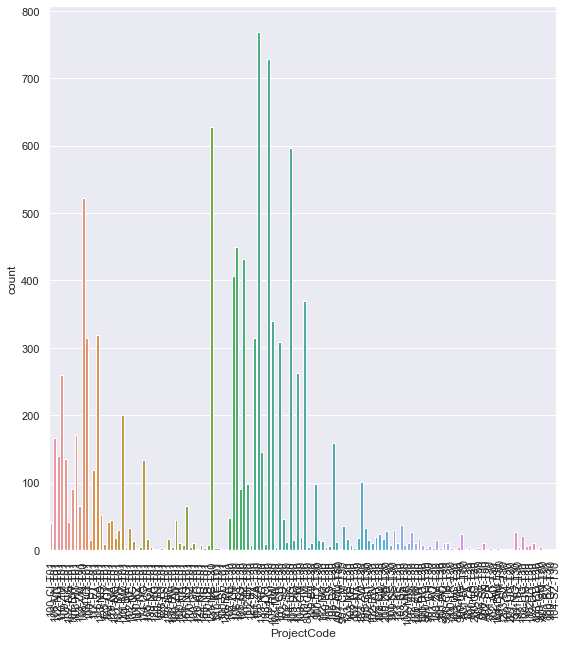

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

plot_counts(df,"ProjectCode")

In [12]:
df.drop("ProjectCode",axis=1,inplace=True)

PQ

In [13]:
df.drop("PQ",axis=1,inplace=True)

POSO

In [14]:
df.drop("POSO",axis=1,inplace=True)

ASNDN

In [15]:
df.drop("ASNDN",axis=1,inplace=True)

Country

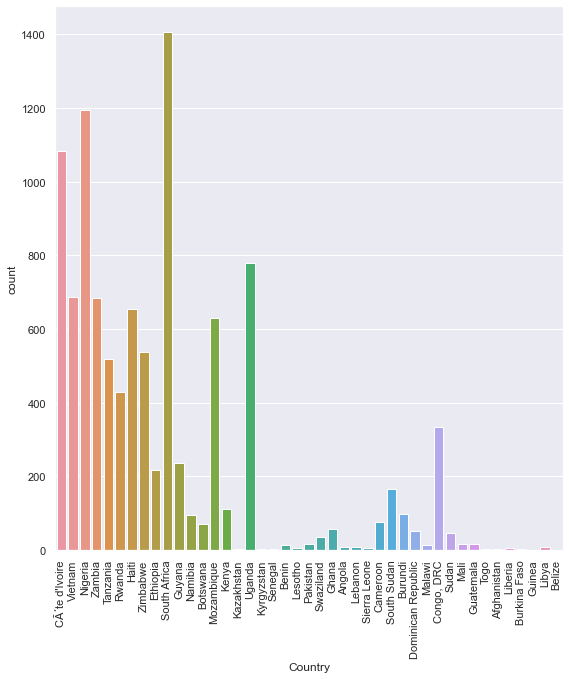

In [16]:
sns.set(rc={'figure.figsize':(20,30)})
plot_counts(df,"Country")

In [17]:
countries_less_than_75=df["Country"].value_counts()[df["Country"].value_counts()<75].index.tolist()
countries_greater_than_75=df["Country"].value_counts()[df["Country"].value_counts()>=75].index.tolist()
df.loc[df.Country.isin(countries_less_than_75), 'Country'] = "Other"

In [18]:
D = df[["Country"]]
D = pd.get_dummies(D, drop_first = True)

df.drop(['Country'],inplace=True,axis=1)

df=pd.concat([df,D], axis = 1)

ManagedBy

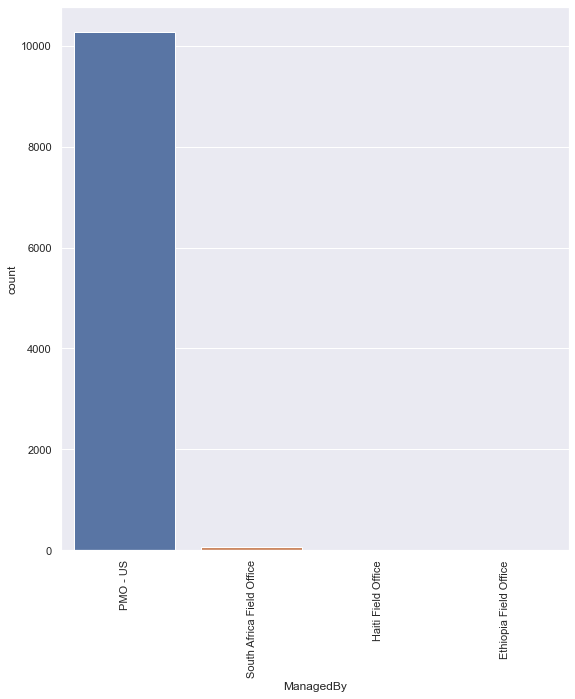

In [19]:
plot_counts(df,"ManagedBy")

In [20]:
lessmanaged=df["ManagedBy"].value_counts()[df["ManagedBy"].value_counts()<100].index.tolist()
greatmanaged=df["ManagedBy"].value_counts()[df["ManagedBy"].value_counts()>100].index.tolist()
df.loc[df.ManagedBy.isin(lessmanaged), 'ManagedBy'] = "Other"

In [21]:
List=list(np.array(["Other"]+greatmanaged).reshape(1,2))
ordinal_encoder = OrdinalEncoder(categories=List)
df['ManagedBy']=ordinal_encoder.fit_transform(np.array(df[['ManagedBy']]))

In [22]:
df["ManagedBy"].value_counts()

1.0    10265
0.0       59
Name: ManagedBy, dtype: int64

FulfillVia

In [23]:
df["FulfillVia"].value_counts()

From RDC       5404
Direct Drop    4920
Name: FulfillVia, dtype: int64

In [24]:
List=list(np.array(["Direct Drop","From RDC"]).reshape(1,2))
ordinal_encoder = OrdinalEncoder(categories=List)
df['FulfillVia']=ordinal_encoder.fit_transform(np.array(df[['FulfillVia']]))

VendorINCOTerm

In [25]:
df["VendorINCOTerm"].value_counts()

N/A - From RDC    5404
EXW               2778
DDP               1443
FCA                397
CIP                275
DDU                 15
DAP                  9
CIF                  3
Name: VendorINCOTerm, dtype: int64

In [26]:
lessmanaged=df["VendorINCOTerm"].value_counts()[df["VendorINCOTerm"].value_counts()<100].index.tolist()
greatmanaged=df["VendorINCOTerm"].value_counts()[df["VendorINCOTerm"].value_counts()>100].index.tolist()
df.loc[df.VendorINCOTerm.isin(lessmanaged), 'VendorINCOTerm'] = "Other"

In [27]:
greatmanaged

['N/A - From RDC', 'EXW', 'DDP', 'FCA', 'CIP']

In [28]:
List=list(np.array(greatmanaged+["Other"]).reshape(1,6))
ordinal_encoder = OrdinalEncoder(categories=List)
df['VendorINCOTerm']=ordinal_encoder.fit_transform(np.array(df[['VendorINCOTerm']]))

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ManagedBy                10324 non-null  float64
 1   FulfillVia               10324 non-null  float64
 2   VendorINCOTerm           10324 non-null  float64
 3   ShipmentMode             9964 non-null   object 
 4   PQFirstSenttoClientDate  10324 non-null  object 
 5   POSenttoVendorDate       10324 non-null  object 
 6   ScheduledDeliveryDate    10324 non-null  object 
 7   DeliveredtoClientDate    10324 non-null  object 
 8   DeliveryRecordedDate     10324 non-null  object 
 9   ProductGroup             10324 non-null  object 
 10  SubClassification        10324 non-null  object 
 11  Vendor                   10324 non-null  object 
 12  ItemDescription          10324 non-null  object 
 13  MoleculeTestType         10324 non-null  object 
 14  Brand                 

ShipmentMode

In [30]:
df["ShipmentMode"].value_counts()

Air            6113
Truck          2830
Air Charter     650
Ocean           371
Name: ShipmentMode, dtype: int64

In [31]:
D = df[["ShipmentMode"]]
D = pd.get_dummies(D, drop_first = True)

df.drop(['ShipmentMode'],inplace=True,axis=1)

df=pd.concat([df,D], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ManagedBy                 10324 non-null  float64
 1   FulfillVia                10324 non-null  float64
 2   VendorINCOTerm            10324 non-null  float64
 3   PQFirstSenttoClientDate   10324 non-null  object 
 4   POSenttoVendorDate        10324 non-null  object 
 5   ScheduledDeliveryDate     10324 non-null  object 
 6   DeliveredtoClientDate     10324 non-null  object 
 7   DeliveryRecordedDate      10324 non-null  object 
 8   ProductGroup              10324 non-null  object 
 9   SubClassification         10324 non-null  object 
 10  Vendor                    10324 non-null  object 
 11  ItemDescription           10324 non-null  object 
 12  MoleculeTestType          10324 non-null  object 
 13  Brand                     10324 non-null  object 
 14  Dosage

PQFirstSenttoClientDate

In [32]:
df["PQFirstSenttoClientDate"].value_counts()

Pre-PQ Process       2476
9/11/2014             205
Date Not Captured     205
7/11/2013             173
4/30/2014             123
                     ... 
7/29/2010               1
10/3/2011               1
12/17/2013              1
2/5/2015                1
8/29/2013               1
Name: PQFirstSenttoClientDate, Length: 765, dtype: int64

In [33]:
df.loc[df['PQFirstSenttoClientDate']!="Pre-PQ Process", 'PQFirstSenttoClientDate'] ="Other"

In [34]:
List=list(np.array(["Pre-PQ Process"]+["Other"]).reshape(1,2))
ordinal_encoder = OrdinalEncoder(categories=List)
df['PQFirstSenttoClientDate']=ordinal_encoder.fit_transform(np.array(df[['PQFirstSenttoClientDate']]))

POSenttoVendorDate

In [35]:
df["POSenttoVendorDate"].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ManagedBy                 10324 non-null  float64
 1   FulfillVia                10324 non-null  float64
 2   VendorINCOTerm            10324 non-null  float64
 3   PQFirstSenttoClientDate   10324 non-null  float64
 4   POSenttoVendorDate        10324 non-null  object 
 5   ScheduledDeliveryDate     10324 non-null  object 
 6   DeliveredtoClientDate     10324 non-null  object 
 7   DeliveryRecordedDate      10324 non-null  object 
 8   ProductGroup              10324 non-null  object 
 9   SubClassification         10324 non-null  object 
 10  Vendor                    10324 non-null  object 
 11  ItemDescription           10324 non-null  object 
 12  MoleculeTestType          10324 non-null  object 
 13  Brand                     10324 non-null  object 
 14  Dosage

In [36]:
df.loc[(df['POSenttoVendorDate']!="N/A - From RDC") &(df['POSenttoVendorDate']!="Date Not Captured"), 'POSenttoVendorDate'] ="Other"

In [37]:
List=list(np.array(["Date Not Captured","N/A - From RDC"]+["Other"]).reshape(1,3))
ordinal_encoder = OrdinalEncoder(categories=List)
df['POSenttoVendorDate']=ordinal_encoder.fit_transform(np.array(df[['POSenttoVendorDate']]))

ScheduledDeliveryDate,DeliveredtoClientDate,DeliveryRecordedDate

In [38]:
df=df.drop(['ScheduledDeliveryDate','DeliveredtoClientDate','DeliveryRecordedDate'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ManagedBy                 10324 non-null  float64
 1   FulfillVia                10324 non-null  float64
 2   VendorINCOTerm            10324 non-null  float64
 3   PQFirstSenttoClientDate   10324 non-null  float64
 4   POSenttoVendorDate        10324 non-null  float64
 5   ProductGroup              10324 non-null  object 
 6   SubClassification         10324 non-null  object 
 7   Vendor                    10324 non-null  object 
 8   ItemDescription           10324 non-null  object 
 9   MoleculeTestType          10324 non-null  object 
 10  Brand                     10324 non-null  object 
 11  Dosage                    8588 non-null   object 
 12  DosageForm                10324 non-null  object 
 13  UnitofMeasurePerPack      10324 non-null  object 
 14  LineIt

ProductGroup

In [39]:
df["ProductGroup"].value_counts()

ARV     8550
HRDT    1728
ANTM      22
ACT       16
MRDT       8
Name: ProductGroup, dtype: int64

In [40]:
D = df[["ProductGroup"]]
D = pd.get_dummies(D, drop_first = True)

df.drop(['ProductGroup'],inplace=True,axis=1)

df=pd.concat([df,D], axis = 1)

SubClassification

In [41]:
D = df[["SubClassification"]]
D = pd.get_dummies(D, drop_first = True)

df.drop(['SubClassification'],inplace=True,axis=1)

df=pd.concat([df,D], axis = 1)

Vendor

In [42]:

df.loc[(df['Vendor']!="SCMS from RDC"), 'Vendor'] ="Other"
List=list(np.array(["SCMS from RDC"]+["Other"]).reshape(1,2))
ordinal_encoder = OrdinalEncoder(categories=List)
df['Vendor']=ordinal_encoder.fit_transform(np.array(df[['Vendor']]))

In [43]:
df["Vendor"].value_counts()

0.0    5404
1.0    4920
Name: Vendor, dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 52 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ManagedBy                               10324 non-null  float64
 1   FulfillVia                              10324 non-null  float64
 2   VendorINCOTerm                          10324 non-null  float64
 3   PQFirstSenttoClientDate                 10324 non-null  float64
 4   POSenttoVendorDate                      10324 non-null  float64
 5   Vendor                                  10324 non-null  float64
 6   ItemDescription                         10324 non-null  object 
 7   MoleculeTestType                        10324 non-null  object 
 8   Brand                                   10324 non-null  object 
 9   Dosage                                  8588 non-null   object 
 10  DosageForm                              10324 non-null  ob

ItemDescription

In [45]:
df["ItemDescription"].value_counts()

Efavirenz 600mg, tablets, 30 Tabs                                                755
Nevirapine 200mg, tablets, 60 Tabs                                               623
Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs                                597
Lamivudine/Nevirapine/Zidovudine 150/200/300mg, tablets, 60 Tabs                 580
HIV 1/2, Determine Complete HIV Kit, 100 Tests                                   577
                                                                                ... 
Lamivudine/Zidovudine+Abacavir 150/300+300mg, tablets, co-blister, 60+60 Tabs      1
HIV, Pepti-LAV 1|2 (HIV-1|2 Ab differenciation, Immuno-Blot)                       1
Malaria Antigen P.f Kit, 30 x 1 Test                                               1
Lopinavir/Ritonavir 80/20mg/ml [Kaletra], oral solution, cool, Bottle, 160 ml      1
Lopinavir/Ritonavir 200/50mg, [DON] tablets, 120 Tabs                              1
Name: ItemDescription, Length: 184, dtype: int64

In [46]:
df=df.drop("ItemDescription",axis=1)

In [47]:
df=df.drop("MoleculeTestType",axis=1)

In [48]:
df.drop("Brand",inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 49 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ManagedBy                               10324 non-null  float64
 1   FulfillVia                              10324 non-null  float64
 2   VendorINCOTerm                          10324 non-null  float64
 3   PQFirstSenttoClientDate                 10324 non-null  float64
 4   POSenttoVendorDate                      10324 non-null  float64
 5   Vendor                                  10324 non-null  float64
 6   Dosage                                  8588 non-null   object 
 7   DosageForm                              10324 non-null  object 
 8   UnitofMeasurePerPack                    10324 non-null  object 
 9   LineItemQuantity                        10324 non-null  object 
 10  LineItemValue                           10324 non-null  ob

In [49]:
df=df.drop(["Dosage","DosageForm","ManufacturingSite"],axis=1)

In [50]:
num_cols=["UnitofMeasurePerPack","LineItemQuantity",
        "LineItemValue","PackPrice"
        ,"UnitPrice","WeightKilograms","FreightCostUSD"]
for i in num_cols:
    df[i]=pd.to_numeric(df[i],errors="coerce")
df.replace('NaN',0)

,ManagedBy,FulfillVia,VendorINCOTerm,PQFirstSenttoClientDate,POSenttoVendorDate,Vendor,UnitofMeasurePerPack,LineItemQuantity,LineItemValue,PackPrice,UnitPrice,FirstLineDesignation,WeightKilograms,FreightCostUSD,LineItemInsuranceUSD,Country_Cameroon,"Country_Congo, DRC",Country_CÃ´te d'Ivoire,Country_Ethiopia,Country_Guyana,Country_Haiti,Country_Kenya,Country_Mozambique,Country_Namibia,Country_Nigeria,Country_Other,Country_Rwanda,Country_South Africa,Country_South Sudan,Country_Tanzania,Country_Uganda,Country_Vietnam,Country_Zambia,Country_Zimbabwe,ShipmentMode_Air Charter,ShipmentMode_Ocean,ShipmentMode_Truck,ProductGroup_ANTM,ProductGroup_ARV,ProductGroup_HRDT,ProductGroup_MRDT,SubClassification_Adult,SubClassification_HIV test,SubClassification_HIV test - Ancillary,SubClassification_Malaria,SubClassification_Pediatric
0,1.0,0.0,1.0,0.0,0.0,1.0,30,19,551.00,29.00,0.97,True,13.0,780.34,None,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,1.0,0.0,1.0,0.0,0.0,1.0,240,1000,6200.00,6.20,0.03,True,358.0,4521.50,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,1.0,0.0,3.0,0.0,0.0,1.0,100,500,40000.00,80.00,0.80,True,171.0,1653.78,None,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,1.0,0.0,1.0,0.0,0.0,1.0,60,31920,127360.80,3.99,0.07,True,1855.0,16007.06,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,1.0,0.0,1.0,0.0,0.0,1.0,60,38000,121600.00,3.20,0.05,True,7590.0,45450.08,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,1.0,1.0,0.0,1.0,1.0,0.0,60,166571,599655.60,3.60,0.06,False,NaN,NaN,705.79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1
10320,1.0,1.0,0.0,1.0,1.0,0.0,60,21072,137389.44,6.52,0.11,False,NaN,NaN,161.71,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
10321,1.0,1.0,0.0,1.0,1.0,0.0,30,514526,5140114.74,9.99,0.33,False,NaN,NaN,5284.04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0
10322,1.0,1.0,0.0,1.0,1.0,0.0,60,17465,113871.80,6.52,0.11,True,1392.0,NaN,134.03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0


In [51]:
imp = SimpleImputer(strategy="mean")
df["LineItemInsuranceUSD"] = imp.fit_transform(df[["LineItemInsuranceUSD"]]).ravel()

In [52]:
for i in num_cols:
    df[i] = imp.fit_transform(df[[i]]).ravel()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 46 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ManagedBy                               10324 non-null  float64
 1   FulfillVia                              10324 non-null  float64
 2   VendorINCOTerm                          10324 non-null  float64
 3   PQFirstSenttoClientDate                 10324 non-null  float64
 4   POSenttoVendorDate                      10324 non-null  float64
 5   Vendor                                  10324 non-null  float64
 6   UnitofMeasurePerPack                    10324 non-null  float64
 7   LineItemQuantity                        10324 non-null  float64
 8   LineItemValue                           10324 non-null  float64
 9   PackPrice                               10324 non-null  float64
 10  UnitPrice                               10324 non-null  fl

In [54]:
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X=df.drop("LineItemValue",axis=1)
y=df["LineItemValue"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [55]:
model=lgb.LGBMRegressor()
model.fit(X_train,y_train)

LGBMRegressor()

In [56]:
r2_score(model.predict(X_test),y_test)

0.9785813869663311